# Task: 
#### To predict whether the intent of the questions is the same as one of the existing questions

# Data Description
- `Data fields`
- 1. `id` - the id of a training set question pair
- 2. `qid1`, `qid2` - unique ids of each question (only available in train.csv)
- 3. `question1`, `question2` - the full text of each question
- 4. `is_duplicate` - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.

# Loading the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving quora.csv to quora.csv


In [ ]:
df= pd.read_csv("quora.csv")
df.head()

,Unnamed: 0,index,id,qid1,qid2,question1,question2,is_duplicate
0,0,8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,1,368101,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,2,70497,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,3,226567,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,4,73186,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


In [ ]:
df.columns

Index(['Unnamed: 0', 'index', 'id', 'qid1', 'qid2', 'question1', 'question2',
       'is_duplicate'],
      dtype='object')

In [ ]:
#no missing values
df.isnull().sum() #gives sum of missing values for each column

Unnamed: 0      0
index           0
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
#dropping Unnamed: 0  and index columns
df.drop(['Unnamed: 0','index'],inplace=True,axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
3,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1
4,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1


# Exploratory Data Analysis

In [ ]:
df.shape
#1 lakh rows and 6 columns

(100000, 6)

In [ ]:
df['is_duplicate'].value_counts()

0    62879
1    37121
Name: is_duplicate, dtype: int64

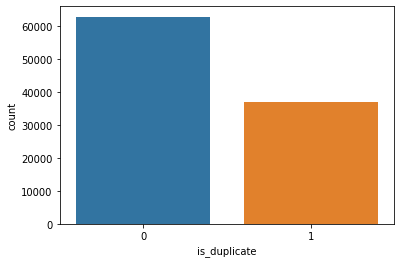

In [ ]:
sns.countplot(x='is_duplicate', data=df)

### Observations:
- The data set looks imbalanced i.e the number of data points which are duplicate are more
- Note: each data point represents if the questions in a pair are duplicate or not ,does not apply to questions in all the data set i.e different questions from different pairs might be similar

In [ ]:
#Balance of the data set

#no. of points which are 0 /total no. of points *100->percentage of points which are 0
percentage_0=(df['is_duplicate'].value_counts()[0]/df.shape[0])*100
percentage_1=(df['is_duplicate'].value_counts()[1]/df.shape[0])*100
print("The ratio of points which are duplicate to not_duplicate in the dataset is:",round(percentage_0,2),"% to ",round(percentage_1,2),"%")
#here round() basically rounds the number to 2 decimal points

The ratio of points which are duplicate to not_duplicate in the dataset is: 62.88 % to  37.12 %


In [ ]:
qid1=[]
qid2=[]
df['qid1'].apply(lambda x:qid1.append(x))
df['qid2'].apply(lambda x:qid2.append(x))
#print(len(qid1),len(qid2))
total_qids=qid1+qid2
print("Total no. of Questions in the Dataset: ",len(total_qids))
#unique questions in the data set
unique_qids=len(set(total_qids))
print("no. of unique questions: ",unique_qids)
print("no. of repeated questions",len(total_qids)-unique_qids)


Total no. of Questions in the Dataset:  200000
no. of unique questions:  166206
no. of repeated questions 33794


# Word Cloud

In [ ]:
#pip install worldcloud
# if u r on windows ,run cmd as admin then type the above

In [ ]:
from wordcloud import WordCloud, STOPWORDS

#### World cloud for non duplicate questions

In [ ]:
df_duplicate = df.loc[df['is_duplicate']==0, :]

In [ ]:
df_duplicate.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0
1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0
2,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0
6,253209,367707,153452,How many hours a week do Google employees work?,How many hours a day do Google employees work ...,0
7,354651,483796,11244,How can we follow a Quora question privately w...,How can we view private Instagram pictures wit...,0


In [ ]:
df_duplicate['is_duplicate'].value_counts()

0    62879
Name: is_duplicate, dtype: int64

In [ ]:
# Creating a new questions column,which is a combination of both the questions
df_duplicate['questions']=df_duplicate['question1']+" "+df_duplicate['question2']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_duplicate.head()

,id,qid1,qid2,question1,question2,is_duplicate,questions
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,How do I play Pokémon GO in Korea? How do I pl...
1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,What are some of the best side dishes for crab...
2,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,Which is more advisable and better material fo...
6,253209,367707,153452,How many hours a week do Google employees work?,How many hours a day do Google employees work ...,0,How many hours a week do Google employees work...
7,354651,483796,11244,How can we follow a Quora question privately w...,How can we view private Instagram pictures wit...,0,How can we follow a Quora question privately w...


In [ ]:
#only keeping the questions column
df_duplicate=df_duplicate.loc[:,['questions']]
df_duplicate.head()

,questions
0,How do I play Pokémon GO in Korea? How do I pl...
1,What are some of the best side dishes for crab...
2,Which is more advisable and better material fo...
6,How many hours a week do Google employees work...
7,How can we follow a Quora question privately w...


In [ ]:
df_duplicate['questions'].value_counts()

How many numbers between 100 and 500 are divisible by 3 or 7? How many numbers between 100 and 500 are divisible by 5 or 7?                                                                                                                                                          1
What gods, spirits, and/or beliefs did Jews have before they became fully monotheistic? Why do people who believe in God (monotheists) just laugh when I say to them I only adore Zeus and the Olympic gods? What makes them feel so smart and sure when they reject my religion?    1
How has regulated moneylending affected the poor in Singapore? How does time switching economically or any other way affect particular country or world?                                                                                                                             1
How can the speed of data transmission be increased? How can the speed of a home WiFi be increased?                                                                

In [ ]:
words = ' '.join(df_duplicate['questions'])
print(words[:5000])

How do I play Pokémon GO in Korea? How do I play Pokémon GO in China? What are some of the best side dishes for crab cakes? What are some good side dishes for buffalo chicken? Which is more advisable and better material for a crash test in automobiles, ductile or brittle? What is the best server setup for buddypress? How many hours a week do Google employees work? How many hours a day do Google employees work on average? How can we follow a Quora question privately without the knowledge of others users? How can we view private Instagram pictures without following them? How do I access reddit in Indonesia since the site has been banned by the Indonesian government? How is Reddit governed? What are the travel API's in India? What is travel API? How do I tell my parents I'm not "grumpy", I'm depressed? Why do meat eaters get grumpy? Moto g4 screen is all black lights light up but can't see anything reset tricks do not work? What would you do if you owned a dog with a human brain, that cou

In [ ]:
cleaned_word =  " ".join([word for word in words.split()
                            if '?' not in word and '%' not in word
                                
                            ])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)

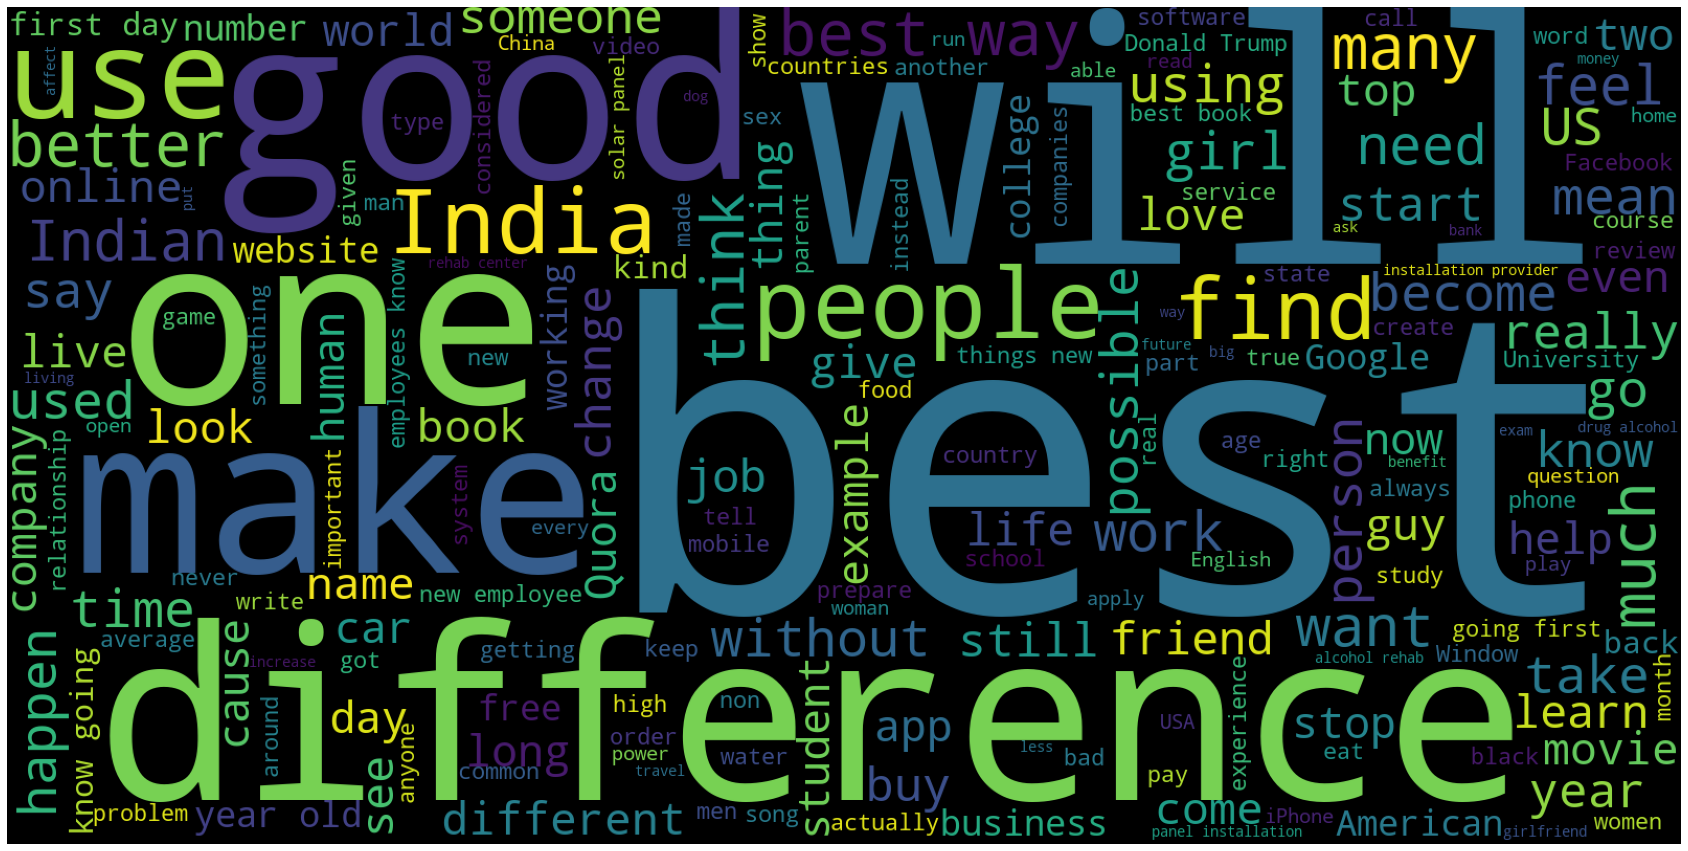

In [ ]:
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### World cloud for duplicate questions

In [ ]:
df_duplicate = df.loc[df['is_duplicate']==1, :]
df_duplicate['questions']=df_duplicate['question1']+" "+df_duplicate['question2']
df_duplicate=df_duplicate.loc[:,['questions']]
words = ' '.join(df_duplicate['questions'])
print(words[:5000])

How do I improve logical programming skills? How can I improve my logical skills for programming? How close we are to see 3rd world war? How close is a World War III? What do Chinese people think about Donald Trump? What do Chinese people think of Donald Trump? Why are cats so overprotective? How do you know if your cat is overprotective? How do I improve logical programming skills? What is the best way to improve logical skills in programming? Is China trying to divert river Brahmaputra? If yes, how should India respond in such a situation? Will India suffer, if China blocks Brahmaputra river? If yes, what will be the solution? What is the Sahara, and how do the average temperatures there compare to the ones in the Taklamakan Desert? What is the Sahara, and how do the average temperatures there compare to the ones in the Dasht-e Loot? How much does an architect earn in India? How much architects earn in India? Where can I download tv series? Which is the best website to download TV sh

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


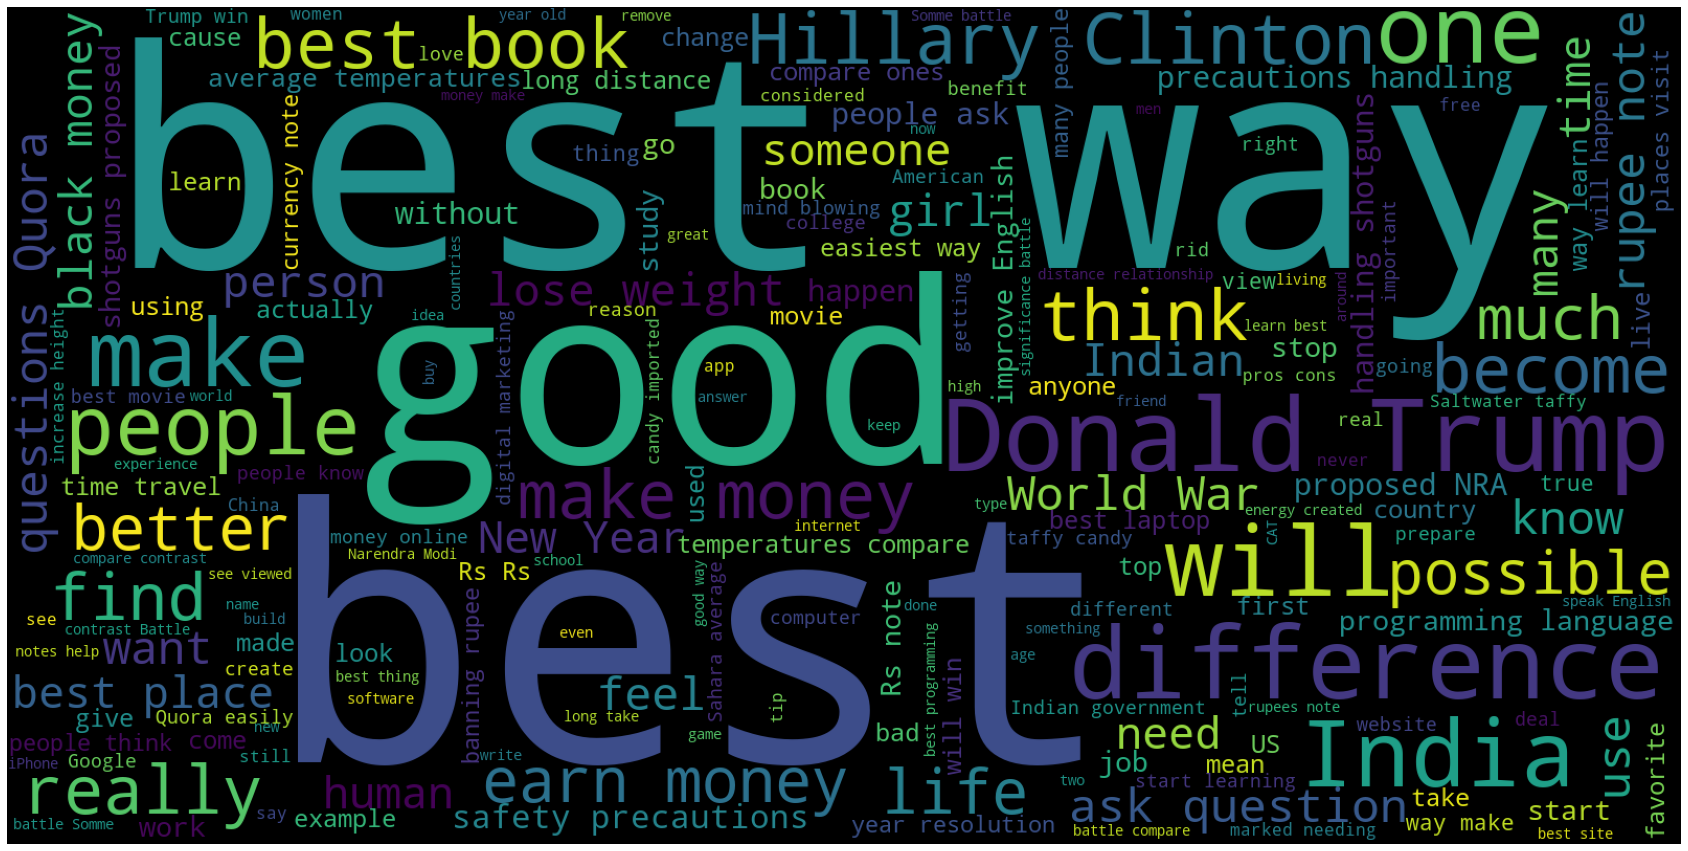

In [ ]:
cleaned_word =  " ".join([word for word in words.split()
                            if '?' not in word and '%' not in word
                                
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1600,
                      height=800
                     ).generate(cleaned_word)
plt.figure(1,figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data Preprocessing
Preprocessing steps:

- Removing special characters
- Convert sentence into lower case
- Remove Stop Words
- Stemming or Lemmatization

In [ ]:
# !pip install nltk

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [ ]:
# initialise the inbuilt Lemmatizer

lemmatizer = WordNetLemmatizer()

In [ ]:
# initializing the lists

clean_question_list = []

question_len_list = []

In [ ]:
def preprocess(raw_tweet, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_question_list.append(" ".join(words))
    
    question_len_list.append(len(words))

In [ ]:
# !pip install tqdm

In [ ]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [ ]:
clean_question_list = []

question_len_list = []

df['question1'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_question1_stem'] = clean_question_list

df['question1_length_stem'] = question_len_list

100%|██████████| 100000/100000 [03:08<00:00, 530.10it/s]


In [ ]:
clean_question_list = []

question_len_list = []

df['question2'].progress_apply(lambda x: preprocess(x, 'stem'))

df['clean_question2_stem'] = clean_question_list

df['question2_length_stem'] = question_len_list

100%|██████████| 100000/100000 [03:14<00:00, 513.96it/s]


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,clean_question1_stem,question1_length_stem,clean_question2_stem,question2_length_stem
0,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,play pok mon go korea,5,play pok mon go china,5
1,368101,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,0,best side dish crab cake,5,good side dish buffalo chicken,5
2,70497,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,0,advis better materi crash test automobil ducti...,8,best server setup buddypress,4
3,226567,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,1,improv logic program skill,4,improv logic skill program,4
4,73186,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,close see rd world war,5,close world war iii,4


# Feature Engineering
- keeping only the required columns

In [ ]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'clean_question1_stem', 'question1_length_stem', 'clean_question2_stem',
       'question2_length_stem'],
      dtype='object')

In [ ]:
df=df.loc[:, ['clean_question1_stem', 'clean_question2_stem', 'is_duplicate']]
df.columns

Index(['clean_question1_stem', 'clean_question2_stem', 'is_duplicate'], dtype='object')

# Bag Of Words Representation

In [ ]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
#doing a 20-80 split
train, test = train_test_split(df,test_size=0.2,random_state=42)


In [ ]:
# df.to_csv('q_train.csv')
# df.to_csv('q_test.csv')

In [ ]:
train.head()

,clean_question1_stem,clean_question2_stem,is_duplicate
75220,properti asia expens asian mental govern strategi,find term asian incred inaccur sinc indian isr...,0
48955,best place visit wayanad kerala,best time visit kerala place visit span day,1
44966,worth learn rubi,worth learn rubi day,1
13568,delet snapchat convers person abl tell,delet snapchat messag neither person see anymor,0
92727,think if better ia long term,one choos ip ia,0


In [ ]:
test.head()

,clean_question1_stem,clean_question2_stem,is_duplicate
75721,fallout take place year great war stuff dilapi...,post nuclear apocalyps environ fallout green b...,0
80184,last book read,last book read,1
19864,becom part whatsapp group without permiss,join whatsapp group without admin permiss,1
76699,would prefer websit ask forgot password rememb...,indian govt promot donat leftov food hotel res...,0
92991,found best qualiti thermal imag camera melbourn,found best qualiti laser sensor melbourn,0


In [ ]:
#converting question 1 into a list

In [ ]:

#appending extra space after each question in question1 column
# so that is can act as a seperation between both the questions when we merge them
train_clean_question1=[]
for question in train['clean_question1_stem']:
    train_clean_question1.append(question+" ")

test_clean_question1=[]
for question in test['clean_question1_stem']:
    test_clean_question1.append(question+" ")

In [ ]:
#converting quetion 2 into a list

In [ ]:
train_clean_question2=[]
for question in train['clean_question2_stem']:
    train_clean_question2.append(question)

test_clean_question2=[]
for question in test['clean_question2_stem']:
    test_clean_question2.append(question)

In [ ]:
#appending both the test and train questions
#https://www.geeksforgeeks.org/python-concatenate-two-lists-element-wise/
train_clean_both_questions = [i + j for i, j in zip(train_clean_question1, train_clean_question2)]
test_clean_both_questions = [i + j for i, j in zip(test_clean_question1, test_clean_question2)]



In [ ]:
# #test_clean_question3=test_clean_question1+test_clean_question2
# for item1 in test_clean_question1:
#   item1.lower()
# for item1 in test_clean_question2:
#   item1.lower()
# test_clean_question3=test_clean_question1+test_clean_question2
# #test_clean_question3=[test_clean_question1+test_clean_question2]


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(ngram_range=(1,3))
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(train_clean_both_questions)
test_features = vectorizer.transform(test_clean_both_questions)

#train_features = vectorizer.fit_transform(train_clean_question1,train_clean_question2)
# test_features = vectorizer.transform(test_clean_question1,test_clean_question2)
#test_features = vectorizer.transform(test_clean_question3)

In [ ]:
#seems related to our problem
#https://stackoverflow.com/questions/30927610/how-to-vectorize-a-data-frame-with-several-text-columns-in-scikit-learn-without
# import scipy.sparse as sp
# vect = CountVectorizer(ngram_range=(1, 3))
# train = sp.hstack(df.apply(lambda col: vect.fit_transform(col)))


# train_features = vectorizer.fit_transform(train_clean_question1)

# test_features = vectorizer.transform(train_clean_question1)

# train_features_2 = vectorizer.fit_transform(train_clean_question2)

# test_features_2 = vectorizer.transform(train_clean_question2)

In [ ]:
type(train_features)


scipy.sparse.csr.csr_matrix

In [ ]:
vectorizer.vocabulary_

{'properti': 19392,
 'asia': 1445,
 'expens': 8107,
 'asian': 1446,
 'mental': 15150,
 'govern': 9784,
 'strategi': 23439,
 'find': 8543,
 'term': 24403,
 'incred': 11588,
 'inaccur': 11529,
 'sinc': 22371,
 'indian': 11621,
 'isra': 12193,
 'iranian': 12094,
 'russian': 21126,
 'also': 718,
 'peopl': 18201,
 'get': 9465,
 'call': 3534,
 'white': 26983,
 'black': 2685,
 'word': 27203,
 'yellow': 27475,
 'east': 7237,
 'consid': 5087,
 'racist': 19879,
 'differ': 6494,
 'best': 2402,
 'place': 18629,
 'visit': 26440,
 'wayanad': 26775,
 'kerala': 12954,
 'time': 24729,
 'span': 22923,
 'day': 5947,
 'worth': 27246,
 'learn': 13665,
 'rubi': 21064,
 'delet': 6144,
 'snapchat': 22652,
 'convers': 5168,
 'person': 18290,
 'abl': 67,
 'tell': 24342,
 'messag': 15204,
 'neither': 16423,
 'see': 21741,
 'anymor': 1113,
 'think': 24590,
 'if': 11332,
 'better': 2417,
 'ia': 11237,
 'long': 14125,
 'one': 17257,
 'choos': 4328,
 'ip': 12062,
 'swear': 23919,
 'bad': 1898,
 'phrase': 18464,
 'st

In [ ]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 27731
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (80000, 27731)


# Baseline Model(Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
    model = LogisticRegression().fit(train_features,train['is_duplicate'])
    pred = model.predict(test_features)
    accuracy = accuracy_score(pred,test['is_duplicate'])
    print('Accuracy of '+LogisticRegression().__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.7299


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Hyper Parameter Tuning For the selection of  n-gram 

In [ ]:
#increasing the max no. of iterations to remove the warning, (which basically means its on local minima and not a global one I think)
#it also increses accuracy,even if its by a little amount
#https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

In [ ]:
model = LogisticRegression(max_iter=300).fit(train_features,train['is_duplicate'])
pred = model.predict(test_features)
accuracy = accuracy_score(pred,test['is_duplicate'])
print('Accuracy of '+LogisticRegression().__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.73045


## Taking n-gram as (1,3)
(this will take a long time almost a minute)

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,3))
train_features = vectorizer.fit_transform(train_clean_both_questions)
test_features = vectorizer.transform(test_clean_both_questions)

In [ ]:
model = LogisticRegression(max_iter=300).fit(train_features,train['is_duplicate'])
pred = model.predict(test_features)
accuracy = accuracy_score(pred,test['is_duplicate'])
print('Accuracy of '+LogisticRegression().__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.77955


## Taking n-gram as (1,4)

In [ ]:
#this will take a very long time!!!
vectorizer = CountVectorizer(ngram_range=(1,4))
train_features = vectorizer.fit_transform(train_clean_both_questions)
test_features = vectorizer.transform(test_clean_both_questions)
model = LogisticRegression(max_iter=300).fit(train_features,train['is_duplicate'])
pred = model.predict(test_features)
accuracy = accuracy_score(pred,test['is_duplicate'])
print('Accuracy of '+LogisticRegression().__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.7813


## Taking n-gram as (1,5)

In [ ]:
# #this will take a very long time!!!
# vectorizer = CountVectorizer(ngram_range=(1,5))
# train_features = vectorizer.fit_transform(train_clean_both_questions)
# test_features = vectorizer.transform(test_clean_both_questions)
# model = LogisticRegression(max_iter=300).fit(train_features,train['is_duplicate'])
# pred = model.predict(test_features)
# accuracy = accuracy_score(pred,test['is_duplicate'])
# print('Accuracy of '+LogisticRegression().__class__.__name__+' is '+str(accuracy))

## Taking n-gram as (1,6)

In [ ]:
# #this will take a very long time!!!
# vectorizer = CountVectorizer(ngram_range=(1,6))
# train_features = vectorizer.fit_transform(train_clean_both_questions)
# test_features = vectorizer.transform(test_clean_both_questions)
# model = LogisticRegression(max_iter=300).fit(train_features,train['is_duplicate'])
# pred = model.predict(test_features)
# accuracy = accuracy_score(pred,test['is_duplicate'])
# print('Accuracy of '+LogisticRegression().__class__.__name__+' is '+str(accuracy))

- #### ngram(1,4) is the best choice  with 300 iteration
- #### there is a very small difference (0.005) between ngram (1,4) and ngram (1,5) but a huge difference in execution time

# Model Comparison

In [ ]:
# #importing pre trained data to save time
# test=pd.read_csv("q_test.csv")
# train=pd.read_csv("q_train.csv")

# train.drop(['Unnamed: 0'],inplace=True,axis=1)
# test.drop(['Unnamed: 0'],inplace=True,axis=1)
# train.head()
# #appending extra space after each question in question1 column
# # so that is can act as a seperation between both the questions when we merge them
# train_clean_question1=[]
# for question in train['clean_question1_stem']:
#     train_clean_question1.append(str(question)+" ")

# test_clean_question1=[]
# for question in test['clean_question1_stem']:
#     test_clean_question1.append(str(question)+" ")

# train_clean_question2=[]
# for question in train['clean_question2_stem']:
#     train_clean_question2.append(question)

# test_clean_question2=[]
# for question in test['clean_question2_stem']:
#     test_clean_question2.append(question)

# #appending both the test and train questions
# #https://www.geeksforgeeks.org/python-concatenate-two-lists-element-wise/
# train_clean_both_questions = [str(i) + str(j) for i, j in zip(train_clean_question1, train_clean_question2)]
# test_clean_both_questions = [str(i) + str(j) for i, j in zip(test_clean_question1, test_clean_question2)]




In [ ]:
train.dtypes

clean_question1_stem    object
clean_question2_stem    object
is_duplicate             int64
dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier()
]

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,4))
train_features = vectorizer.fit_transform(train_clean_both_questions)
test_features = vectorizer.transform(test_clean_both_questions)

In [ ]:
#commented bcoz it takes a lot of time
# import time
# start = time.process_time()
# # your code here    

# for classifier in Classifiers:
#     start = time.process_time()
#     model = classifier.fit(train_features,train['is_duplicate'])
#     pred = model.predict(test_features)
#     accuracy = accuracy_score(pred,test['is_duplicate'])
#     print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))
#     #con_metrics = metrics.confusion_matrix(test['is_duplicate'], pred)
#     #print("Confusion metrics for is: "+con_metrics)
#     #sns.heatmap(con_metrics, annot=True, fmt='d')
#     #plt.title("Confusion Matrix")
#     #plt.show()
#     #Checking Precision, Recall and F1 Score
#     print(metrics.classification_report(test['is_duplicate'], pred))
#     print(time.process_time() - start)

# print(time.process_time() - start)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of LogisticRegression is 0.7813
              precision    recall  f1-score   support

           0       0.79      0.89      0.84     12570
           1       0.76      0.60      0.67      7430

    accuracy                           0.78     20000
   macro avg       0.77      0.75      0.75     20000
weighted avg       0.78      0.78      0.78     20000

60.43577324199998



#### Accuracy of LogisticRegression is 0.7813  

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     12570
           1       0.76      0.60      0.67      7430

    accuracy                           0.78     20000
   macro avg       0.77      0.75      0.75     20000  
weighted avg       0.78      0.78      0.78     20000  


63.518177087000026  ->time taken  
#### Accuracy of DecisionTreeClassifier is 0.73805  

              precision    recall  f1-score   support

           0       0.77      0.82      0.80     12570
           1       0.66      0.60      0.63      7430

    accuracy                           0.74     20000
   macro avg       0.72      0.71      0.71     20000  
weighted avg       0.73      0.74      0.73     20000

1529.638285912  ->time taken  
#### Accuracy of SVC is 0.76625  

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     12570
           1       0.76      0.54      0.63      7430

    accuracy                           0.77     20000
   macro avg       0.76      0.72      0.73     20000  
weighted avg       0.77      0.77      0.76     20000

4192.753925278  ->time taken  
#### Accuracy of RandomForestClassifier is 0.77865  

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     12570
           1       0.80      0.53      0.64      7430

    accuracy                           0.78     20000
   macro avg       0.79      0.73      0.74     20000  
weighted avg       0.78      0.78      0.77     20000

10253.952045508999 ->time taken  
10253.952340035


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
- Accuracy of LogisticRegression is 0.7813
- Accuracy of DecisionTreeClassifier is 0.73835
- Accuracy of SVC is 0.76625
- Accuracy of RandomForestClassifier is 0.77705

#### Took approx 5(4.45) hours to execute this code
#### hyperparameter tuning for anything other than logistic regression will take a very long time

# Hyperparameter Tuning using  K fold cross validation For logistic regression

## Tuning to Find the best max_iter value for the default solver

In [ ]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
# #takes a lot of time to execute that's why commented
# tuned_parameters = [{'max_iter':[10, 100, 300, 500, 700]}]#list of dicts
# clf = GridSearchCV(
#     LogisticRegression(), tuned_parameters, scoring='accuracy'
# )
# clf.fit(train_features, train['is_duplicate'])

# print("Best parameters set found on train set:")
# print(clf.best_params_)
# print(clf.best_estimator_)
# print()

# print(clf.score(test_features, test['is_duplicate']))

### Results
- Best parameters set found on train set:
- {'max_iter': 300}
                   LogisticRegression(C=1.0, class_weight=None, dual=False,fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

- Accuracy=0.7813

## Tunning to find the best Solver

In [ ]:
# tuned_parameters = [{'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag']}]#list of dicts
# clf = GridSearchCV(
#     LogisticRegression(), tuned_parameters, scoring='accuracy'
# )
# clf.fit(train_features, train['is_duplicate'])

# print("Best parameters set found on train set:")
# print(clf.best_params_)
# print(clf.best_estimator_)
# print()

# print(clf.score(test_features, test['is_duplicate']))

- Best parameters set found on train set:
{'solver': 'sag'}
                   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy=0.77965

### Using the solver as sag and max_iter as 300

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,4))
train_features = vectorizer.fit_transform(train_clean_both_questions)
test_features = vectorizer.transform(test_clean_both_questions)
model = LogisticRegression(max_iter=300,solver='sag').fit(train_features,train['is_duplicate'])
pred = model.predict(test_features)
accuracy = accuracy_score(pred,test['is_duplicate'])
print('Accuracy of '+LogisticRegression().__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.78135


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


### Accuracy of LogisticRegression is 0.78135

### Best solver is the sag solver with 300 iterations giving the accuracy of 0.7814 with n-gram(1,4)

# Regularizing the model with Hyperparameter Tuning

In [ ]:
# This code took more than 8 hours and still didn't execute so it was broken and the tuning was done seperately
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# import time
# start = time.process_time()
# # your code here 
# #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# tuned_parameters = [{'penalty':['l1', 'l2'],'C':[0.0000001,0.000001,0.00001,0.0001,0.001,0.1,1, 10, 100],'solver':['sag', 'saga'],'max_iter':[300,500,700]}]#list of dicts
# clf = RandomizedSearchCV(
#     LogisticRegression(), tuned_parameters, scoring='accuracy',cv=3
# )
# clf.fit(train_features, train['is_duplicate'])

# print("Best parameters set found on train set:")
# print(clf.best_params_)
# print(clf.best_estimator_)
# print()

# print(clf.score(test_features, test['is_duplicate']))
# print("time taken is:")
# print(time.process_time() - start)

In [ ]:
#comenting the code bcoz it takes a lot of time
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# import time
# start = time.process_time()
# # your code here 
# #https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# tuned_parameters = [{'penalty':['l1', 'l2'],'C':[0.0000001,0.000001,0.0001,0.1,1]}]#list of dicts
# clf = RandomizedSearchCV(
#     LogisticRegression(), tuned_parameters, scoring='accuracy',cv=3
# )
# clf.fit(train_features, train['is_duplicate'])

# print("Best parameters set found on train set:")
# print(clf.best_params_)
# print(clf.best_estimator_)
# print()

# print(clf.score(test_features, test['is_duplicate']))
# print("time taken is:")
# print(time.process_time() - start)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

Best parameters set found on train set:
{'penalty': 'l2', 'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.7813
time taken is:
416.78241486700006


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best parameters set found on train set:
{'penalty': 'l2', 'C': 1}

                   LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy=0.7813  
time taken is: 416.78241486700006 seconds


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time
start = time.process_time()
# your code here 
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
tuned_parameters = [{'penalty':['l2'],'C':[1,10,100],'solver':['sag', 'saga'],'max_iter':[300]}]#list of dicts
clf = RandomizedSearchCV(
    LogisticRegression(), tuned_parameters, scoring='accuracy',cv=3
)
clf.fit(train_features, train['is_duplicate'])

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(test_features, test['is_duplicate']))
print("time taken is:")
print(time.process_time() - start)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_it

Best parameters set found on train set:
{'solver': 'sag', 'penalty': 'l2', 'max_iter': 300, 'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

0.78135
time taken is:
590.3791511709999


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best parameters set found on train set:
{'solver': 'sag', 'penalty': 'l2', 'max_iter': 300, 'C': 1}

                   LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracies= 0.78135  
time taken is:
590.3791511709999

## The model does not seem to be converging so more tuning is being done for max_iter

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time
start = time.process_time()
# your code here 
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
tuned_parameters = [{'penalty':['l2'],'C':[1],'solver':['sag'],'max_iter':[350,500,700,850]}]#list of dicts
clf = RandomizedSearchCV(
    LogisticRegression(), tuned_parameters, scoring='accuracy',cv=3
)
clf.fit(train_features, train['is_duplicate'])

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(test_features, test['is_duplicate']))
print("time taken is:")
print(time.process_time() - start)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_it

Best parameters set found on train set:
{'solver': 'sag', 'penalty': 'l2', 'max_iter': 350, 'C': 1}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=350,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

0.78135
time taken is:
626.4579507569999


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Best parameters set found on train set:
{'solver': 'sag', 'penalty': 'l2', 'max_iter': 350, 'C': 1}


                   LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=350,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

0.78135
time taken is:
626.4579507569999

### Best solver is the sag solver with 350 iterations,'penalty': 'l2'and C=1 giving the accuracy of 0.7814 with n-gram(1,4) ,The convergence was not reached even at max_iter=800

# Plotting ROC-AUC curve for the Logistic Regression Model

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1,4))
train_features = vectorizer.fit_transform(train_clean_both_questions)
test_features = vectorizer.transform(test_clean_both_questions)
model = LogisticRegression(max_iter=350,solver='sag',penalty='l2',C=1).fit(train_features,train['is_duplicate'])
pred = model.predict(test_features)
accuracy = accuracy_score(pred,test['is_duplicate'])
print('Accuracy of '+LogisticRegression().__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.7814


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
model = LogisticRegression(max_iter=300,solver='sag',penalty='l2',C=1).fit(train_features,train['is_duplicate'])
pred = model.predict(test_features)
accuracy = accuracy_score(pred,test['is_duplicate'])
print('Accuracy of '+LogisticRegression().__class__.__name__+' is '+str(accuracy))

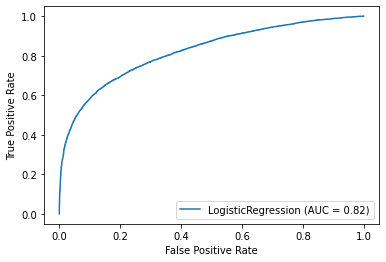

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(model,test_features,test['is_duplicate'])

# Model Comparison
### Default Hyperparameters are used with n-gram(1,4) for model comparison and hyperparameter tuning is done on the model with best Evalution metric score

## 1.Logistic Regression
Accuracy of LogisticRegression is 0.7813 

|                  	| precision 	| recall 	| f1-score 	|   	|
|------------------	|-----------	|--------	|----------	|---	|
| 0                	| 0.79      	| 0.89   	| 0.84     	|   	|
| 1                	| 0.76      	| 0.60   	| 0.67     	|   	|
| macro average    	| 0.77      	| 0.75   	| 0.75     	|   	|
| weighted average 	| 0.78      	| 0.78   	| 0.78     	|   	|


## 2.Decision Tree Classifier
Accuracy of DecisionTreeClassifier is 0.73805

|                  	| precision 	| recall 	| f1-score 	|
|------------------	|-----------	|--------	|----------	|
| 0                	| 0.77      	| 0.82   	| 0.80     	|
| 1                	| 0.66      	| 0.60   	| 0.63     	|
| macro average    	| 0.72      	| 0.71   	| 0.71     	|
| weighted average 	| 0.73      	| 0.74   	| 0.73     	|

## 3.Support Vector Classifier
Accuracy of SVC is 0.76625 

|                  	| precision 	| recall 	| f1-score 	|
|------------------	|-----------	|--------	|----------	|
| 0                	| 0.77      	| 0.90   	| 0.83     	|
| 1                	| 0.76      	| 0.54   	| 0.63     	|
| macro average    	| 0.76      	| 0.72   	| 0.73     	|
| weighted average 	| 0.77      	| 0.77   	| 0.76     	|

## 4.Random Forest Classifier
Accuracy of RandomForestClassifier is 0.77865

|                  	| precision 	| recall 	| f1-score 	|
|------------------	|-----------	|--------	|----------	|
| 0                	| 0.77      	| 0.92   	| 0.84     	|
| 1                	| 0.80      	| 0.53   	| 0.64     	|
| macro average    	| 0.79      	| 0.73   	| 0.74     	|
| weighted average 	| 0.78      	| 0.78   	| 0.77     	|

## Plots for model comparision

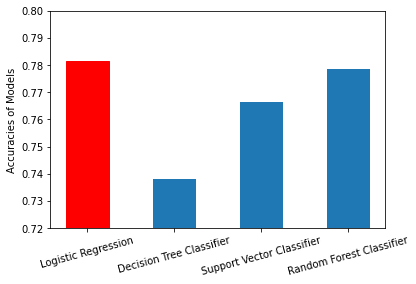

In [ ]:
import math
model_names=['Logistic Regression','Decision Tree Classifier','Support Vector Classifier','Random Forest Classifier']
model_accuracies=[0.7813,0.73805,0.76625,0.77865]
#low = min(model_accuracies)
#high = max(model_accuracies)
low=0.72
high=0.80
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
plt.ylim(low,high)
plt.xticks(rotation=15)
plt.ylabel("Accuracies of Models")
plot1=plt.bar(model_names,model_accuracies,width=0.5)
plot1[0].set_color('red')


# The code after this is still work in progress, For now only the Above code will be considered

# Using Pre Trained Glove Model 

### Using TF-IDF

In [ ]:
#since this is already loading the data we trained  no need to execute it again to save time
df=pd.read_csv("Quora_trained_2.csv")

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
#from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
# merging questions of both Q1 and Q2 to a single list
questions = list(df['clean_question1_stem']) + list(df['clean_question2_stem'])  # len(questions): 2lakh 
print("The number of all the questions is",len(questions)) 

tfidf = TfidfVectorizer() #  Convert a collection of raw documents to a matrix of TF-IDF features

tfidf.fit_transform(questions)  # Converting out text to a matrix of TF-IDF features



The number of all the questions is 4322


<4322x4733 sparse matrix of type '<class 'numpy.float64'>'
	with 22823 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf.get_feature_names()

['aa',
 'aaa',
 'aachar',
 'aachen',
 'aadaab',
 'aadam',
 'aadhaar',
 'aadhar',
 'aadmi',
 'aahat',
 'aaj',
 'aakash',
 'aalavandhan',
 'aaloma',
 'aalto',
 'aam',
 'aamdaar',
 'aamir',
 'aan',
 'aang',
 'aanika',
 'aanvla',
 'aao',
 'aap',
 'aapk',
 'aapl',
 'aarcitectur',
 'aardman',
 'aarhu',
 'aaron',
 'aaronson',
 'aarp',
 'aasmaan',
 'aau',
 'aawad',
 'aax',
 'aayi',
 'ab',
 'abacu',
 'abandon',
 'abandonado',
 'abap',
 'abaqu',
 'abas',
 'abash',
 'abaya',
 'abba',
 'abbey',
 'abbott',
 'abbottabad',
 'abbrevi',
 'abbvi',
 'abc',
 'abcd',
 'abdaal',
 'abdic',
 'abdomen',
 'abdomin',
 'abduct',
 'abdul',
 'abdullah',
 'abe',
 'abednego',
 'abgt',
 'abhay',
 'abhigyan',
 'abhishek',
 'abhiyan',
 'abhor',
 'abhyaa',
 'abid',
 'abigail',
 'abil',
 'abilit',
 'abinitio',
 'abiot',
 'abl',
 'ablat',
 'ableton',
 'ablut',
 'abn',
 'abnorm',
 'aboard',
 'abod',
 'abolish',
 'abolit',
 'abomin',
 'aboobackeramani',
 'aborigin',
 'aborign',
 'abort',
 'aboutdelta',
 'abouth',
 'aboutlast

In [ ]:
# mapping our feature_names with their resptive tf-idf score  ( dict key:word and value:tf-idf score )
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [ ]:
word2tfidf

{'aa': 10.498027444415463,
 'aaa': 11.008853068181454,
 'aachar': 12.512930464957728,
 'aachen': 11.819783284397783,
 'aadaab': 12.512930464957728,
 'aadam': 12.512930464957728,
 'aadhaar': 9.517198191403738,
 'aadhar': 9.468408027234306,
 'aadmi': 10.315705887621508,
 'aahat': 12.107465356849564,
 'aaj': 12.107465356849564,
 'aakash': 10.903492552523629,
 'aalavandhan': 12.512930464957728,
 'aaloma': 12.512930464957728,
 'aalto': 12.512930464957728,
 'aam': 10.261638666351233,
 'aamdaar': 12.512930464957728,
 'aamir': 10.498027444415463,
 'aan': 12.107465356849564,
 'aang': 11.819783284397783,
 'aanika': 12.512930464957728,
 'aanvla': 12.512930464957728,
 'aao': 11.414318176289619,
 'aap': 9.399415155747354,
 'aapk': 12.512930464957728,
 'aapl': 12.512930464957728,
 'aarcitectur': 12.512930464957728,
 'aardman': 12.107465356849564,
 'aarhu': 12.512930464957728,
 'aaron': 11.126636103837837,
 'aaronson': 12.512930464957728,
 'aarp': 12.512930464957728,
 'aasmaan': 12.512930464957728,
 

In [ ]:
#https://www.kaggle.com/gadaadhaarigeek/feature-engg-fuzzy-features-word2vec(Credits where they ae due)
import spacy

In [ ]:
# en_vectors_web_lg is a pre trained GLOVE model which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

In [ ]:
#For Question1
vecs1 = []

# Set up in the spacy model
vect_dim = len(nlp(df["clean_question1_stem"][0])[0].vector)

for qu1 in tqdm(list(df["clean_question1_stem"])):
    mean_vec1 = np.zeros([1, vect_dim])
    if len(qu1) != 0:
        doc1 = nlp(qu1)
        mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
        for word1 in doc1:
            vec1 = word1.vector
            try: 
                idf = word2tfidf[str(word)]
            except:
                idf = 0
            mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)        

df["q1_feats_tfidf_avg_w2v"] = list(vecs1)

100%|██████████| 100000/100000 [13:37<00:00, 122.31it/s]


In [ ]:
#For Question 2
vecs2 = []

# Set up in the spacy model
vect_dim = len(nlp(df["clean_question2_stem"][0])[0].vector)

for qu2 in tqdm(list(df['clean_question2_stem'])):
    mean_vec2 = np.zeros([1, vect_dim])
    if len(qu2) != 0:
        doc2 = nlp(qu2) 
        mean_vec2 = np.zeros([len(doc1), len(doc2[0].vector)])        
        for word2 in doc2:
            # word2vec
            vec2 = word2.vector
            # fetch idf score
            try:
                idf = word2tfidf[str(word2)]
            except:
                idf = 0
            # computing idf weighted avg w2v
            mean_vec2 += vec2 * idf
    mean_vec2 = mean_vec2.mean(axis=0)
    vecs2.append(mean_vec2)

df['q2_feats_tfidf_avg_w2v'] = list(vecs2)

100%|██████████| 100000/100000 [13:28<00:00, 123.76it/s]


In [ ]:
df.head()

,clean_question1_stem,clean_question2_stem,is_duplicate,clean_question1,clean_question2,q1_feats_tfidf_avg_w2v,q2_feats_tfidf_avg_w2v
0,play pok mon go korea,play pok mon go china,0,play pok mon go korea,play pok mon go china,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2999396324157715, -35.79620027542114, -4.01..."
1,best side dish crab cake,good side dish buffalo chicken,0,best side dish crab cake,good side dish buffalo chicken,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[15.848052680492401, -45.6773726940155, -79.28..."
2,advis better materi crash test automobil ducti...,best server setup buddypress,0,advis better materi crash test automobil ducti...,best server setup buddypress,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[24.49544756114483, -25.948683738708496, 1.465..."
3,improv logic program skill,improv logic skill program,1,improv logic program skill,improv logic skill program,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-16.826723098754883, -31.035128116607666, -63..."
4,close see rd world war,close world war iii,1,close see rd world war,close world war iii,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.3571610450744629, -53.280075550079346, -25...."


In [ ]:
df['q1_feats_tfidf_avg_w2v']

0        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
2        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                               ...                        
99995    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
99996    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
99997    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
99998    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
99999    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: q1_feats_tfidf_avg_w2v, Length: 100000, dtype: object

In [ ]:
#https://www.kaggle.com/tahahussein/eda-document-similarity-word2vec-modeling
vecs1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(df['clean_question1_stem'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), 96])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += (vec1 * idf)
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)
df['q1_feats_m'] = list(vecs1)

100%|██████████| 2161/2161 [00:18<00:00, 114.75it/s]


In [ ]:
df.head()

,clean_question1_stem,clean_question2_stem,is_duplicate,clean_question1,clean_question2,q1_feats_tfidf_avg_w2v,q2_feats_tfidf_avg_w2v,q1_feats_m,qid1,qid2,question1,question2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,play pok mon go korea,play pok mon go china,0,play pok mon go korea,play pok mon go china,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0.29993963 -35.79620028 -4.01259947 3...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,1,1,34,34,8,8,7.0,16.0,0.437500,2,0
1,best side dish crab cake,good side dish buffalo chicken,0,best side dish crab cake,good side dish buffalo chicken,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 15.84805268 -45.67737269 -79.28399801 2...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,1,1,53,51,11,9,6.0,20.0,0.300000,2,0
2,advis better materi crash test automobil ducti...,best server setup buddypress,0,advis better materi crash test automobil ducti...,best server setup buddypress,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 24.49544756 -25.94868374 1.46540594 19.45...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,1,1,96,45,16,8,2.0,24.0,0.083333,2,0
3,improv logic program skill,improv logic skill program,1,improv logic program skill,improv logic skill program,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[-16.8267231 -31.03512812 -63.87285614 21.41...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,2,1,44,52,7,9,4.0,16.0,0.250000,3,1
4,close see rd world war,close world war iii,1,close see rd world war,close world war iii,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0.35716105 -53.28007555 -25.06425297 22.29...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,1,1,38,29,9,7,3.0,16.0,0.187500,2,0


In [ ]:
# df.to_csv('Quora_trained_2.csv')

In [ ]:
# from google.colab import files
  
  
# uploaded = files.upload()

# Advanced Feature Engineering

In [ ]:
# from google.colab import files
  
  
# uploaded = files.upload()

In [ ]:
#df= pd.read_csv("Quora_trained_1.csv")
df1=pd.read_csv("quora.csv")
df= pd.read_csv("Quora_trained_2.csv")

- freq_qid1 = Frequency of qid1's
- freq_qid2 = Frequency of qid2's
- q1len = Length of q1
- q2len = Length of q2
- q1_n_words = Number of words in Question 1
- q2_n_words = Number of words in Question 2
- word_Common = (Number of common unique words in Question 1 and Question 2)
- word_Total =(Total num of words in Question 1 + Total num of words in Question 2)
- word_share = (word_common)/(word_Total)
- freq_q1+freq_q2 = sum total of frequency of qid1 and qid2
- freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2
https://www.kaggle.com/tahahussein/eda-document-similarity-word2vec-modeling

In [ ]:
df1.columns

Index(['Unnamed: 0', 'index', 'id', 'qid1', 'qid2', 'question1', 'question2',
       'is_duplicate'],
      dtype='object')

In [ ]:
df['qid1']=df1['qid1']
df['qid2']=df1['qid2']
df['question1']=df1['question1']
df['question2']=df1['question2']
df['id']=df1['id']

In [ ]:
df.head()

,Unnamed: 0,clean_question1_stem,clean_question2_stem,is_duplicate,clean_question1,clean_question2,q1_feats_tfidf_avg_w2v,q2_feats_tfidf_avg_w2v,q1_feats_m,qid1,qid2,question1,question2,id
0,0,play pok mon go korea,play pok mon go china,0,play pok mon go korea,play pok mon go china,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0.29993963 -35.79620028 -4.01259947 3...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,8067
1,1,best side dish crab cake,good side dish buffalo chicken,0,best side dish crab cake,good side dish buffalo chicken,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 15.84805268 -45.67737269 -79.28399801 2...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,368101
2,2,advis better materi crash test automobil ducti...,best server setup buddypress,0,advis better materi crash test automobil ducti...,best server setup buddypress,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 24.49544756 -25.94868374 1.46540594 19.45...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,70497
3,3,improv logic program skill,improv logic skill program,1,improv logic program skill,improv logic skill program,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[-16.8267231 -31.03512812 -63.87285614 21.41...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,226567
4,4,close see rd world war,close world war iii,1,close see rd world war,close world war iii,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0.35716105 -53.28007555 -25.06425297 22.29...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,73186


In [ ]:
df.columns

Index(['Unnamed: 0', 'clean_question1_stem', 'clean_question2_stem',
       'is_duplicate', 'clean_question1', 'clean_question2',
       'q1_feats_tfidf_avg_w2v', 'q2_feats_tfidf_avg_w2v', 'q1_feats_m',
       'qid1', 'qid2', 'question1', 'question2', 'id'],
      dtype='object')

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)
# del df['Unnamed: 0.1']

In [ ]:
df.columns


Index(['clean_question1_stem', 'clean_question2_stem', 'is_duplicate',
       'clean_question1', 'clean_question2', 'q1_feats_tfidf_avg_w2v',
       'q2_feats_tfidf_avg_w2v', 'q1_feats_m', 'qid1', 'qid2', 'question1',
       'question2', 'id'],
      dtype='object')

In [ ]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
df['q1len'] = df['question1'].str.len() 
df['q2len'] = df['question2'].str.len()
df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,clean_question1_stem,clean_question2_stem,is_duplicate,clean_question1,clean_question2,q1_feats_tfidf_avg_w2v,q2_feats_tfidf_avg_w2v,q1_feats_m,qid1,qid2,question1,question2,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words
0,play pok mon go korea,play pok mon go china,0,play pok mon go korea,play pok mon go china,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0.29993963 -35.79620028 -4.01259947 3...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,8067,1,1,34,34,8,8
1,best side dish crab cake,good side dish buffalo chicken,0,best side dish crab cake,good side dish buffalo chicken,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 15.84805268 -45.67737269 -79.28399801 2...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,12736,104117,What are some of the best side dishes for crab...,What are some good side dishes for buffalo chi...,368101,1,1,53,51,11,9
2,advis better materi crash test automobil ducti...,best server setup buddypress,0,advis better materi crash test automobil ducti...,best server setup buddypress,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 24.49544756 -25.94868374 1.46540594 19.45...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,121486,121487,Which is more advisable and better material fo...,What is the best server setup for buddypress?,70497,1,1,96,45,16,8
3,improv logic program skill,improv logic skill program,1,improv logic program skill,improv logic skill program,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[-16.8267231 -31.03512812 -63.87285614 21.41...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,254474,258192,How do I improve logical programming skills?,How can I improve my logical skills for progra...,226567,2,1,44,52,7,9
4,close see rd world war,close world war iii,1,close see rd world war,close world war iii,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0.35716105 -53.28007555 -25.06425297 22.29...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,48103,3062,How close we are to see 3rd world war?,How close is a World War III?,73186,1,1,38,29,9,7


In [ ]:
def normalized_word_Common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)
df['word_Common'] = df.apply(normalized_word_Common, axis=1)

def normalized_word_Total(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))
df['word_Total'] = df.apply(normalized_word_Total, axis=1)

def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
df['word_share'] = df.apply(normalized_word_share, axis=1)

df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

In [ ]:
print ("Minimum length of the questions in question1 : " , min(df['q1_n_words']))

print ("Minimum length of the questions in question2 : " , min(df['q2_n_words']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_n_words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['q2_n_words']== 1].shape[0])
df.columns

Minimum length of the questions in question1 :  3
Minimum length of the questions in question2 :  2
Number of Questions with minimum length [question1] : 0
Number of Questions with minimum length [question2] : 0


Index(['clean_question1_stem', 'clean_question2_stem', 'is_duplicate',
       'clean_question1', 'clean_question2', 'q1_feats_tfidf_avg_w2v',
       'q2_feats_tfidf_avg_w2v', 'q1_feats_m', 'qid1', 'qid2', 'question1',
       'question2', 'id', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len',
       'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share',
       'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

# Advanced Feature Extraction (NLP and Fuzzy Features)
Definition:

Token: You get a token by splitting sentence a space
Stop_Word : stop words as per NLTK.
Word : A token that is not a stop_word
Features:

cwc_min : Ratio of common_word_count to min lenghth of word count of Q1 and Q2
cwc_min = common_word_count / (min(len(q1_words), len(q2_words))

cwc_max : Ratio of common_word_count to max lenghth of word count of Q1 and Q2
cwc_max = common_word_count / (max(len(q1_words), len(q2_words))

csc_min : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2
csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))

csc_max : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2
csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))

ctc_min : Ratio of common_token_count to min lenghth of token count of Q1 and Q2
ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens))

ctc_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2
ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens))


last_word_eq : Check if last word of both questions is equal or not
last_word_eq = int(q1_tokens[-1] == q2_tokens[-1])


first_word_eq : Check if First word of both questions is equal or not
first_word_eq = int(q1_tokens[0] == q2_tokens[0])


abs_len_diff : Abs. length difference
abs_len_diff = abs(len(q1_tokens) - len(q2_tokens))


mean_len : Average Token Length of both Questions
mean_len = (len(q1_tokens) + len(q2_tokens))/2


fuzz_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


fuzz_partial_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


token_sort_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

token_set_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/

longest_substr_ratio : Ratio of length longest common substring to min lenghth of token count of Q1 and Q2
longest_substr_ratio = len(longest common substring) / (min(len(q1_tokens), len(q2_tokens))


# Training models

In [ ]:
df.columns

Index(['clean_question1_stem', 'clean_question2_stem', 'is_duplicate',
       'clean_question1', 'clean_question2', 'q1_feats_tfidf_avg_w2v',
       'q2_feats_tfidf_avg_w2v', 'q1_feats_m', 'qid1', 'qid2', 'question1',
       'question2', 'id', 'freq_qid1', 'freq_qid2', 'q1len', 'q2len',
       'q1_n_words', 'q2_n_words', 'word_Common', 'word_Total', 'word_share',
       'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

In [ ]:
df.drop(['clean_question1_stem','clean_question2_stem','clean_question1','clean_question2','question1','question2'],axis=1,inplace=True)

In [ ]:
# del df['q1_feats_m']

In [ ]:
# del df['Unnamed: 0']

In [ ]:
df.dtypes

is_duplicate                int64
q1_feats_tfidf_avg_w2v     object
q2_feats_tfidf_avg_w2v     object
q1_feats_m                 object
qid1                        int64
qid2                        int64
id                          int64
freq_qid1                   int64
freq_qid2                   int64
q1len                       int64
q2len                       int64
q1_n_words                  int64
q2_n_words                  int64
word_Common               float64
word_Total                float64
word_share                float64
freq_q1+q2                  int64
freq_q1-q2                  int64
dtype: object

In [ ]:
df['q1_feats_tfidf_avg_w2v'].unique()

array(['[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'],
      dtype=object)

In [ ]:
df['q1_feats_tfidf_avg_w2v'].isnull().any()

False

In [ ]:
df['q1_feats_tfidf_avg_w2v'].isnull().sum()

0

In [ ]:
df[df.columns[2]].count()

2161

In [ ]:
df.dtypes

is_duplicate                int64
q1_feats_tfidf_avg_w2v     object
q2_feats_tfidf_avg_w2v     object
q1_feats_m                 object
qid1                        int64
qid2                        int64
id                          int64
freq_qid1                   int64
freq_qid2                   int64
q1len                       int64
q2len                       int64
q1_n_words                  int64
q2_n_words                  int64
word_Common               float64
word_Total                float64
word_share                float64
freq_q1+q2                  int64
freq_q1-q2                  int64
dtype: object

In [ ]:
df['q1_feats_tfidf_avg_w2v'].head()

0    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
1    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
2    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
3    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
4    [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...
Name: q1_feats_tfidf_avg_w2v, dtype: object

In [ ]:
df['q1_feats_tfidf_avg_w2v'][0]

'[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]'

In [ ]:
df['q2_feats_tfidf_avg_w2v'].head()

0    [   0.29993963  -35.79620028   -4.01259947   3...
1    [  15.84805268  -45.67737269  -79.28399801   2...
2    [ 24.49544756 -25.94868374   1.46540594  19.45...
3    [-16.8267231  -31.03512812 -63.87285614  21.41...
4    [  0.35716105 -53.28007555 -25.06425297  22.29...
Name: q2_feats_tfidf_avg_w2v, dtype: object

In [ ]:
df['q2_feats_tfidf_avg_w2v'][0]

'[   0.29993963  -35.79620028   -4.01259947   38.14258661   40.68637025\n  108.14738846  -74.22877169   64.54686123   62.95625639  120.93053436\n   41.19341707  -33.71842694   56.84841633    2.6925472     5.31942415\n  -45.59859824  -26.45635438   12.06035995  -55.28091598  -15.27564144\n   34.85621333   -3.9433583   -53.88811016  -85.12796283  -32.18085539\n  -52.68033662    0.23739925 -103.87780952   38.15783095  -15.88126546\n   22.91675401  -18.37716645   -1.1326766   -47.27665997    5.97768927\n  -31.42404604  109.80399418   13.68696165  -10.36123031    6.47279763\n   36.03398085   32.59925842  -15.26070207  -73.52344608  -15.29862064\n   23.87855816   46.1763742    -3.61849618  -27.94661424   40.79121447\n  -49.71469975  -23.82255156   -8.2411232    15.20362663  -95.54619622\n   20.93895558   80.41497159   78.0385046   -29.22915339  -16.00641584\n   82.77021503  -10.27359855  -69.82973146  -14.99029231   12.54252201\n  -44.62010098   17.22140574  -30.50587344  -22.97699499  -29.3

In [ ]:
a=df['q2_feats_tfidf_avg_w2v'][0]
print(a[0],a[1],a[2],a[3],a[4],a[5])

[       0 .


In [ ]:
df.dtypes

is_duplicate                int64
q1_feats_tfidf_avg_w2v     object
q2_feats_tfidf_avg_w2v     object
q1_feats_m                 object
qid1                        int64
qid2                        int64
id                          int64
freq_qid1                   int64
freq_qid2                   int64
q1len                       int64
q2len                       int64
q1_n_words                  int64
q2_n_words                  int64
word_Common               float64
word_Total                float64
word_share                float64
freq_q1+q2                  int64
freq_q1-q2                  int64
dtype: object

In [ ]:
df3=df
df3_q1 = pd.DataFrame(df3['q1_feats_tfidf_avg_w2v'].values.tolist(), index= df3.index)
df3_q2 = pd.DataFrame(df3['q2_feats_tfidf_avg_w2v'].values.tolist(), index= df3.index)

In [ ]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
df3_q1['id']=df['id']
df3_q2['id']=df['id']
#df1  = df1.merge(df2, on='id',how='left')
df2  = df3_q1.merge(df3_q2, on='id',how='left')
result  = df.merge(df2, on='id',how='left')
df=result

In [ ]:
df.head()

,is_duplicate,q1_feats_tfidf_avg_w2v,q2_feats_tfidf_avg_w2v,q1_feats_m,qid1,qid2,id,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,0_y
0,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0.29993963 -35.79620028 -4.01259947 3...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,15738,15739,8067,1,1,34,34,8,8,7.0,16.0,0.437500,2,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0.29993963 -35.79620028 -4.01259947 3...
1,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 15.84805268 -45.67737269 -79.28399801 2...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,12736,104117,368101,1,1,53,51,11,9,6.0,20.0,0.300000,2,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 15.84805268 -45.67737269 -79.28399801 2...
2,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 24.49544756 -25.94868374 1.46540594 19.45...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,121486,121487,70497,1,1,96,45,16,8,2.0,24.0,0.083333,2,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 24.49544756 -25.94868374 1.46540594 19.45...
3,1,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[-16.8267231 -31.03512812 -63.87285614 21.41...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,254474,258192,226567,2,1,44,52,7,9,4.0,16.0,0.250000,3,1,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[-16.8267231 -31.03512812 -63.87285614 21.41...
4,1,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0.35716105 -53.28007555 -25.06425297 22.29...,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,48103,3062,73186,1,1,38,29,9,7,3.0,16.0,0.187500,2,0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,[ 0.35716105 -53.28007555 -25.06425297 22.29...


In [ ]:
df.dtypes

is_duplicate                int64
q1_feats_tfidf_avg_w2v     object
q2_feats_tfidf_avg_w2v     object
q1_feats_m                 object
qid1                        int64
qid2                        int64
id                          int64
freq_qid1                   int64
freq_qid2                   int64
q1len                       int64
q2len                       int64
q1_n_words                  int64
q2_n_words                  int64
word_Common               float64
word_Total                float64
word_share                float64
freq_q1+q2                  int64
freq_q1-q2                  int64
0_x                        object
0_y                        object
dtype: object

In [ ]:
del df['q1_feats_tfidf_avg_w2v']
del df['q2_feats_tfidf_avg_w2v']
del df['q1_feats_m']


In [ ]:
df.dtypes

is_duplicate      int64
qid1              int64
qid2              int64
id                int64
freq_qid1         int64
freq_qid2         int64
q1len             int64
q2len             int64
q1_n_words        int64
q2_n_words        int64
word_Common     float64
word_Total      float64
word_share      float64
freq_q1+q2        int64
freq_q1-q2        int64
0_x              object
0_y              object
dtype: object

In [ ]:
print("Number of features in nlp dataframe :", df.shape[1])
print("Number of features in preprocessed dataframe :", df.shape[1])
print("Number of features in question1 w2v  dataframe :", df3_q1.shape[1])
print("Number of features in question2 w2v  dataframe :", df3_q2.shape[1])
print("Number of features in final dataframe  :", df.shape[1]+df2.shape[1]+df3_q1.shape[1]+df3_q2.shape[1])

Number of features in nlp dataframe : 20
Number of features in preprocessed dataframe : 20
Number of features in question1 w2v  dataframe : 2
Number of features in question2 w2v  dataframe : 2
Number of features in final dataframe  : 27


In [ ]:
cols = list(df.columns)
for i in cols:
    df[i] = df[i].apply(pd.to_numeric)
    print(i)

is_duplicate


ValueError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(df)

ValueError: ignored

In [ ]:
# splitting into test and train

from sklearn.model_selection  import train_test_split
#doing a 20-80 split
train, test = train_test_split(df,test_size=0.2,random_state=42)


In [ ]:
y_train=train['is_duplicate']
y_test=test['is_duplicate']
train_features=train
del train_features['is_duplicate']
test_features=test
del test_features['is_duplicate']

In [ ]:
train.dtypes

qid1             int64
qid2             int64
id               int64
freq_qid1        int64
freq_qid2        int64
q1len            int64
q2len            int64
q1_n_words       int64
q2_n_words       int64
word_Common    float64
word_Total     float64
word_share     float64
freq_q1+q2       int64
freq_q1-q2       int64
0_x             object
0_y             object
dtype: object

In [ ]:
model = LogisticRegression(max_iter=300,solver='sag').fit(train_features,y_train)
pred = model.predict(test_features)
accuracy = accuracy_score(pred,y_test)
print('Accuracy of '+LogisticRegression().__class__.__name__+' is '+str(accuracy))

ValueError: ignored

# HyperParameter Tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

https://www.kaggle.com/anujmenta/word2vec-implementation
